In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 加载数据
#fu = np.load(r"feature/ZBH/fu_ZBH.npy")
#notfu = np.load(r"feature/ZBH/notfu_ZBH.npy")  # 确保这里加载的是notfu数据喵

f = np.load(r"feature/20.npy")
fu = f[:501]
notfu = f[501:3812]
test = f[3812:3822]

# 合并数据
X = np.concatenate((fu, notfu), axis=0)
y = np.concatenate((np.ones(len(fu)), np.zeros(len(notfu))), axis=0)  # 1代表fu，0代表notfu

# 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
len(fu)

501

In [48]:
len(notfu)

3311

In [49]:
# 定义SVC的参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],  # 惩罚参数
    'gamma': ['scale', 'auto'],  # 核函数系数
    'kernel': ['rbf', 'poly', 'sigmoid']  # 核函数类型
}

# 创建SVC对象
svc = SVC()

# 创建网格搜索对象
clf = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# 进行网格搜索
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [50]:
y_pred = clf.predict(X_val)
print(f1_score(y_val, y_pred, average="macro"))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

0.9736046771266742


array([[633,   5],
       [  6, 119]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

print('分类报告:') 	#包括准确率、召回率、f1得分等
print(classification_report(y_val, y_pred))

分类报告:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       638
         1.0       0.96      0.95      0.96       125

    accuracy                           0.99       763
   macro avg       0.98      0.97      0.97       763
weighted avg       0.99      0.99      0.99       763



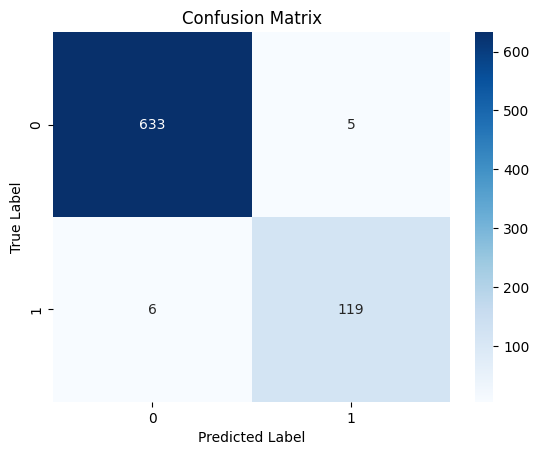

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)

# 使用Seaborn绘制混淆矩阵的热图
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
#test=np.load(r"feature/ZBH/testfu_ZBH.npy")

In [54]:
# 预测测试集
y_pred = clf.predict(test)

# 把预测结果转换为整数
y_pred_int = y_pred.astype(int)

# 现在y_pred_int中的值将不再有小数点喵
y_pred_int

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])